# Big Mart Sales Data

**Dataset Overview**

BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. 

The data has been collected form the following link: https://datahack.analyticsvidhya.com/contest/practice-problem-big-mart-sales-iii/

In [1]:
import pandas as pd
import numpy as np

# for plotting graphs
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.style as style

# for imputing missing values
from impyute.imputation.cs import mice

# for having consistency in those randomy generated values
import random
random.seed(2020)

# Collecting Data

The dataset consists sales data of Big Mart.

In [2]:
# importing dataset

sales_df = pd.read_csv('./data/big_mart_sales_train.csv')
sales_df.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350


In [3]:
sales_df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

We have the following na values

outlet_size = 2410

item_weight = 1463

# Data Cleaning

**Converting column names to lowercase**

In [4]:
sales_df.columns = sales_df.columns = [x.lower() for x in sales_df.columns.array]

**Replacing High with Large in outlet_size**

The word Large seems more logical than High

In [5]:
sales_df.outlet_size.replace(to_replace='High', value='Large', inplace=True)

**Filling na values in outlet_type**

In [6]:
sales_df[(sales_df['outlet_type'] == 'Grocery Store')]['outlet_size'].unique()

array([nan, 'Small'], dtype=object)

As Grocery Stores only of Small types, we can replace na with 'Small'.

In [7]:
# storing index of rows with nan values in outlet size of Grocery Stores
outlet_size_nan = sales_df[(sales_df['outlet_type'] == 'Grocery Store') & (sales_df['outlet_size'].isna())].index
print(len(outlet_size_nan))

555


In [8]:
# replacing nan with Small in outlet_size where outlet_type is Grocery Store
sales_df.loc[outlet_size_nan, 'outlet_size'] = sales_df.loc[outlet_size_nan, 'outlet_size'].fillna('Small')

In [9]:
sales_df.isna().sum()

item_identifier                 0
item_weight                  1463
item_fat_content                0
item_visibility                 0
item_type                       0
item_mrp                        0
outlet_identifier               0
outlet_establishment_year       0
outlet_size                  1855
outlet_location_type            0
outlet_type                     0
item_outlet_sales               0
dtype: int64

We have the following na values

outlet_size = 1855

item_weight = 1463

In [10]:
sales_df[(sales_df['outlet_type'] == 'Supermarket Type1')]['outlet_size'].unique()

array(['Medium', 'Large', nan, 'Small'], dtype=object)

In [11]:
sales_df[(sales_df['outlet_type'] == 'Supermarket Type1') &
        (sales_df['outlet_location_type'] == 'Tier 2')]['outlet_size'].unique()

array([nan, 'Small'], dtype=object)

We have nan only in Tier 2 locations. As Tier 2 only have small size outlets, we can replace nan with Small.

In [12]:
# Storing id of nan values in Supermarket Type1
outlet_size_nan_tier2 = sales_df[(sales_df['outlet_type'] == 'Supermarket Type1') &
        (sales_df['outlet_location_type'] == 'Tier 2') &
        (sales_df['outlet_size'].isna())].index

print(len(outlet_size_nan_tier2))

1855


In [13]:
# replacing nan with Small in outlet_size where
# outlet_type is Supermarket Type1
# outlet_location_type is Tier 2

sales_df.loc[outlet_size_nan_tier2, 'outlet_size'] = sales_df.loc[outlet_size_nan_tier2, 'outlet_size'].fillna('Small')

In [14]:
sales_df.isna().sum()

item_identifier                 0
item_weight                  1463
item_fat_content                0
item_visibility                 0
item_type                       0
item_mrp                        0
outlet_identifier               0
outlet_establishment_year       0
outlet_size                     0
outlet_location_type            0
outlet_type                     0
item_outlet_sales               0
dtype: int64

**Fixing label errors in item fat content**

Low Fact has also been written as low fat, LF

Regular has also been written as reg

In [15]:
print("item_fat_content: ", sales_df.item_fat_content.unique())

item_fat_content:  ['Low Fat' 'Regular' 'low fat' 'LF' 'reg']


In [16]:
# fixing typing errors in item fat content
sales_df.item_fat_content.replace(['low fat', 'LF'], 'Low Fat', inplace=True)
sales_df.item_fat_content.replace(['reg'], 'Regular', inplace=True)

print("item_fat_content: ", sales_df.item_fat_content.unique())

item_fat_content:  ['Low Fat' 'Regular']


**Converting the below columns into category**

1. item_fat_content
2. outlet_size
3. outlet_location_type
4. outlet_type
5. item_type

In [17]:
fat_content = ['Low Fat', 'Regular']
size = ['Small', 'Medium', 'Large']
location_type = ['Tier 1', 'Tier 2', 'Tier 3']
o_type = ['Grocery Store', 'Supermarket Type1', 'Supermarket Type2', 'Supermarket Type3']

fats_cat = pd.CategoricalDtype(categories=fat_content, ordered=True)
size_cat = pd.CategoricalDtype(categories=size, ordered=True)
location_type_cat = pd.CategoricalDtype(categories=location_type)
o_type_cat = pd.CategoricalDtype(categories=o_type, ordered=True)

sales_df['item_fat_content'] = sales_df['item_fat_content'].astype(fats_cat)
sales_df['outlet_size'] = sales_df['outlet_size'].astype(size_cat)
sales_df['outlet_location_type'] = sales_df['outlet_location_type'].astype(location_type_cat)
sales_df['outlet_type'] = sales_df['outlet_type'].astype(o_type_cat)
sales_df['item_type'] = sales_df['item_type'].astype('category')

In [18]:
# only Outlet 27 and 19 have empty values
sales_df[sales_df.item_weight.isna()]['outlet_identifier'].unique()

array(['OUT027', 'OUT019'], dtype=object)

In [19]:
print("Outlet 27 is: ", sales_df[sales_df.outlet_identifier == 'OUT027']['outlet_type'].unique()) 
print("Outlet 19 is: ", sales_df[sales_df.outlet_identifier == 'OUT019']['outlet_type'].unique())

Outlet 27 is:  [Supermarket Type3]
Categories (1, object): [Supermarket Type3]
Outlet 19 is:  [Grocery Store]
Categories (1, object): [Grocery Store]


**Replacing 0 in item_visibility**

- Using mean of each item identifier to replace with nan values

In [20]:
item_identifier_mean = sales_df.groupby('item_identifier').mean()['item_visibility']
item_identifier_mean

item_identifier
DRA12    0.031956
DRA24    0.048062
DRA59    0.134718
DRB01    0.082126
DRB13    0.008002
           ...   
NCZ30    0.024956
NCZ41    0.051623
NCZ42    0.009044
NCZ53    0.027775
NCZ54    0.080426
Name: item_visibility, Length: 1559, dtype: float64

In [21]:
# converting 0 to nan
sales_df.item_visibility.replace(to_replace=0, value=np.nan, inplace=True)

In [22]:
# finding index of nan values
ind =  sales_df[sales_df.item_visibility.isna()].index

# replacing them with of respective item identifier
sales_df.loc[ind, 'item_visibility'] = item_identifier_mean[sales_df.loc[ind, 'item_identifier']].values

**Filling item_weight**

- Performing same steps as above for filling item weight too

In [23]:
item_identifier_mean = sales_df.groupby('item_identifier').mean()['item_weight']
ind =  sales_df[sales_df.item_weight.isna()].index
sales_df.loc[ind, 'item_weight'] = item_identifier_mean[sales_df.loc[ind, 'item_identifier']].values

In [24]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
item_identifier              8523 non-null object
item_weight                  8519 non-null float64
item_fat_content             8523 non-null category
item_visibility              8523 non-null float64
item_type                    8523 non-null category
item_mrp                     8523 non-null float64
outlet_identifier            8523 non-null object
outlet_establishment_year    8523 non-null int64
outlet_size                  8523 non-null category
outlet_location_type         8523 non-null category
outlet_type                  8523 non-null category
item_outlet_sales            8523 non-null float64
dtypes: category(5), float64(4), int64(1), object(2)
memory usage: 509.1+ KB


In [25]:
sales_df[sales_df.item_weight.isna()]

,item_identifier,item_weight,item_fat_content,item_visibility,item_type,item_mrp,outlet_identifier,outlet_establishment_year,outlet_size,outlet_location_type,outlet_type,item_outlet_sales
927,FDN52,NaN,Regular,0.130933,Frozen Foods,86.9198,OUT027,1985,Medium,Tier 3,Supermarket Type3,1569.9564
1922,FDK57,NaN,Low Fat,0.079904,Snack Foods,120.0440,OUT027,1985,Medium,Tier 3,Supermarket Type3,4434.2280
4187,FDE52,NaN,Regular,0.029742,Dairy,88.9514,OUT027,1985,Medium,Tier 3,Supermarket Type3,3453.5046
5022,FDQ60,NaN,Regular,0.191501,Baking Goods,121.2098,OUT019,1985,Small,Tier 1,Grocery Store,120.5098


Filling the remaining 4 values manually

In [26]:
ind = sales_df[sales_df.item_identifier == 'FDN52'].index
sales_df.loc[ind, 'item_weight'] = sales_df[(sales_df.item_type == 'Frozen Foods') & (sales_df.outlet_size == 'Medium')]['item_weight'].mean()

ind = sales_df[sales_df.item_identifier == 'FDK57'].index
sales_df.loc[ind, 'item_weight'] = sales_df[(sales_df.item_type == 'Snack Foods') & (sales_df.outlet_size == 'Medium')]['item_weight'].mean()

ind = sales_df[sales_df.item_identifier == 'FDE52'].index
sales_df.loc[ind, 'item_weight'] = sales_df[(sales_df.item_type == 'Dairy') & (sales_df.outlet_size == 'Medium')]['item_weight'].mean()

ind = sales_df[sales_df.item_identifier == 'FDQ60'].index
sales_df.loc[ind, 'item_weight'] = sales_df[(sales_df.item_type == 'Baking Goods') & (sales_df.outlet_size == 'Small')]['item_weight'].mean()

In [27]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
item_identifier              8523 non-null object
item_weight                  8523 non-null float64
item_fat_content             8523 non-null category
item_visibility              8523 non-null float64
item_type                    8523 non-null category
item_mrp                     8523 non-null float64
outlet_identifier            8523 non-null object
outlet_establishment_year    8523 non-null int64
outlet_size                  8523 non-null category
outlet_location_type         8523 non-null category
outlet_type                  8523 non-null category
item_outlet_sales            8523 non-null float64
dtypes: category(5), float64(4), int64(1), object(2)
memory usage: 509.1+ KB


**Adding new column**

total_items_sold = item_outlet_sales / item_mrp

mrp_per_gram = item_mrp / item_weight

In [28]:
sales_df['total_items_sold'] = np.round(sales_df['item_outlet_sales'] / sales_df['item_mrp'], 0)
sales_df['total_items_sold'] = sales_df['total_items_sold'].astype('int')

In [29]:
sales_df['mrp_per_gram'] = sales_df['item_mrp'] / sales_df['item_weight']

**Having a broader category of items**

Adding new column, indicating item type into 3 categories:

1. Food
2. Drinks
3. Non-consumable

The 1st 2 alphabets of item_identifier indicate the following:

1. FD : Food
2. DR : Drinks
3. NC : Non-consumable

In [30]:
# adding new column 'food_type'
sales_df['food_type'] = sales_df.item_identifier.apply(lambda x:x[:2]).map({
    'FD' : 'Food',
    'DR' : 'Drinks',
    'NC' : 'Non-consumable'
})

In [31]:
# converting the food_type column into category
food_types = ['Food', 'Drinks', 'Non-consumable']
food_types_cat = pd.CategoricalDtype(categories=food_types)
sales_df['food_type'] = sales_df['food_type'].astype(food_types_cat)

**Adding operating years columns**

Will contain detail of since how many years the outlet has been operating.

As the data is of 2013, we will subtract 2013 from the outlet establishment year. We will also add 1 because the dataset also contains data of 2013.

In [32]:
sales_df['operating_years'] = sales_df.outlet_establishment_year.apply(lambda x: 2013 - x + 1)

# Functions

To simplify repetative tasks while creating visualizations

## Add Data Labels in Bar Plot

In [33]:
def countplotDataLabels(ax, orient='v', scale=None, keep_decimals=0, adjust_label_h=0, keep_y_decimals = 0):
    """
    Returns axes with data labels plotted on bars.
    
    Arguments
    ---------
    ax : axes, The axes of the graph
    
    orient : 'v', 'h', optional.
    Default is v. Used to specify how the plot is to correctly plot the data labels
    
    scale : 'k', optional. Default is None.
    Used to scale the y axis. k is used to scale down by 1000.
    
    keep_decimals : int, optional. Default is 0.
    Used to set how many numbers we need after the decimals in the data labels.
    If 0 then data label will be converted into integer
    
    adjust_label_h : int, optional. Default is 0
    Used to specify how high the data label should be kept on every bar.
    
    Returns
    -------
    ax : axes with plotted data labels
    """
    for bar in ax.patches:
        x_pos = bar.get_x()
        y_pos = bar.get_y()
        
        height = height_label = bar.get_height()
        width = width_label = bar.get_width()
        
        if np.isnan(height) or np.isnan(width):
            continue
     
                
        suffix = ""
        divide_by = 1
        if scale != None:
            if scale == 'k':
                suffix = 'k'
                divide_by = 1000
            elif scale == 'm':
                suffix = 'm'
                divide_by = 1000000
                
            height_label = height_label / divide_by
            width_label = width_label / divide_by

            new_yticks = []
            for val in ax.get_yticks():
                tick = val / divide_by
                if tick > 1:
                    new_yticks.append(str(np.round(tick, keep_y_decimals)) + suffix)
                else:
                    new_yticks.append(str(np.round(tick, keep_y_decimals)) + suffix)

            ax.set_yticklabels(new_yticks)
        
        if keep_decimals == 0:
            height_label = int(height_label)
            width_label = int(width_label)
        else:
            height_label = np.round(height_label, keep_decimals)
            width_label = np.round(width_label, keep_decimals)
            
        if orient == 'v':
            
            ax.text(x_pos + width / 2, height + adjust_label_h, str(height_label)+suffix, ha='center')
        elif orient == 'h':
            ax.text(width, y_pos + height / 2, str(width_label)+suffix, va='center')
    
    return ax

## Change bar width

In [34]:
def changeBarWidth(ax, width):
    """
    To change the bar width in plots.
    
    Arguments
    ---------
    ax : axes
    
    width : int. The width of the bar.
    
    Returns:
    --------
    ax : ax with changed bar width
    """
    for bar, xtick in zip(ax.patches, ax.get_xticks()):
        bar.set_width(width)
        bar.set_x(xtick - width/2)
        
    return countplotDataLabels(ax)

## Set labels

In [35]:
def setLabels(ax, xlabel, ylabel, xsize = None, ysize = None):
    """
    To set xlabel, ylabel and title in plot
    
    Arguments
    ---------
    ax : axes
    
    xlabel : String. The label for x axis
    
    ylabel : String. The label for y axis
    
    xsize : int, None. Optional. Sets size of x label.
    
    ysize : int, None. Optional. Sets size of y label.
    
    Returns:
    -------
    ax : ax with labels and title
    """
    if xsize != None and xsize > 0:
        ax.set_xlabel(xlabel, fontsize = xsize)
        
    if ysize != None and ysize > 0:
        ax.set_ylabel(ylabel, fontsize = ysize)
        
    if xsize == None:
        ax.set_xlabel(xlabel)

    if ysize == None:
        ax.set_ylabel(ylabel)
    
    return ax

# Data Analysis and Visualizations

It is divided into 3 sections

1. Tiers
2. Outlets
3. Items

In [36]:
base_color = sns.color_palette()[0]
sns.set(rc={'figure.figsize':(8, 6)})

## Tiers

### How many outlets are available in each Tier ?

Are the outlets evenly distributed or any specific tier has dominancy in outlets count

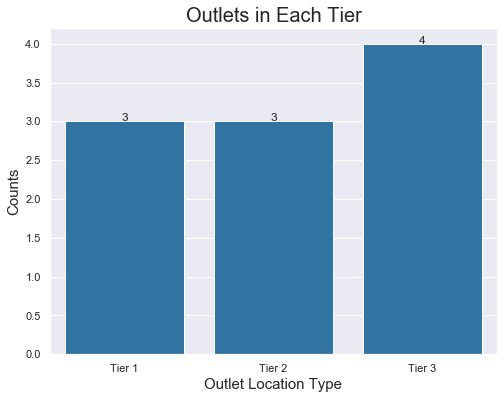

In [37]:
# Creating DF
outlets_in_tier = sales_df.drop_duplicates('outlet_identifier')
outlets_in_tier = outlets_in_tier.groupby('outlet_location_type').count().reset_index()[['outlet_location_type', 'item_identifier']]
outlets_in_tier.columns = ['tier', 'outlet_counts']

# Plotting data
ax = sns.barplot(data = outlets_in_tier, x = 'tier', y='outlet_counts', color=base_color)
ax = setLabels(ax, 'Outlet Location Type', 'Counts', 15, 15)
ax = countplotDataLabels(ax)
ax.set_title('Outlets in Each Tier', fontsize=20);

**Observations**

Tier 1 and 2 have 3 outlets in each whereas Tier 3 have 4 outlets

### What is average item counts in each Tier ?

Finding average item count to find even results and remove the advantage of extra outlet in Tier 3.

TODO : Creating new DF with Tiers and average items in each tier.

In [38]:
items_per_tier = sales_df.groupby('outlet_location_type').count().reset_index()[['outlet_location_type', 'item_outlet_sales']]
items_per_tier.columns = ['tier', 'total_items']
items_per_tier['avg_items'] = items_per_tier['total_items'] / outlets_in_tier['outlet_counts']
items_per_tier.sort_values('total_items', ascending=False, inplace=True)
items_per_tier['change_percent'] = items_per_tier.avg_items.pct_change() * 100
items_per_tier

,tier,total_items,avg_items,change_percent
2,Tier 3,3350,837.500000,NaN
1,Tier 2,2785,928.333333,10.845771
0,Tier 1,2388,796.000000,-14.254937


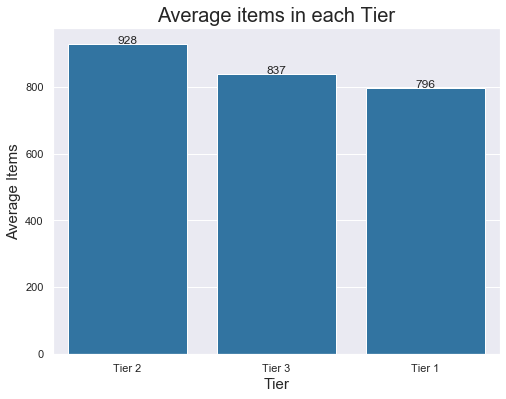

In [39]:
# ordering the data in descending
order = items_per_tier.sort_values('avg_items', ascending=False)['tier']

ax = sns.barplot(data=items_per_tier, 
                 x='tier', 
                 y='avg_items', 
                 color=base_color, 
                 order=order);

# adding data labels
ax = countplotDataLabels(ax)
ax = setLabels(ax, 'Tier', 'Average Items', 15, 15)
ax.set_title('Average items in each Tier', fontsize=20);

**Observations**:

- Tier 2 has the highest average items.

- Although Tier 3 had an extra outlet, it stands 2nd in average item counts

### Does Tier 2 also have highest sales ?

In [40]:
total_sales_per_tier = sales_df.groupby('outlet_location_type').sum()['item_outlet_sales'].reset_index()
total_sales_per_tier.columns = ['tier', 'total_sales']
total_sales_per_tier['avg_sales'] = total_sales_per_tier['total_sales'] / outlets_in_tier['outlet_counts']
total_sales_per_tier

,tier,total_sales,avg_sales
0,Tier 1,4.482059e+06,1.494020e+06
1,Tier 2,6.472314e+06,2.157438e+06
2,Tier 3,7.636753e+06,1.909188e+06


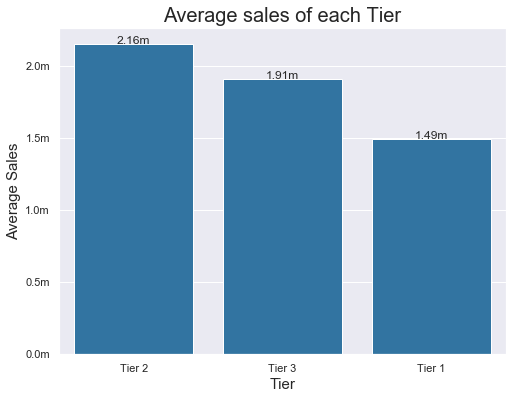

In [41]:
# order = total_sales_per_tier.sort_values('avg_sales', ascending=False).set_index('outlet_location_type').index
order = total_sales_per_tier.sort_values('avg_sales', ascending=False)['tier']

ax = sns.barplot(data=total_sales_per_tier, 
                 x='tier', 
                 y='avg_sales', order=order, color=base_color)

ax = countplotDataLabels(ax, scale='m', keep_decimals=2, keep_y_decimals = 2)

ax = setLabels(ax, 'Tier', 'Average Sales', 15, 15)
ax.set_title('Average sales of each Tier', fontsize = 20);

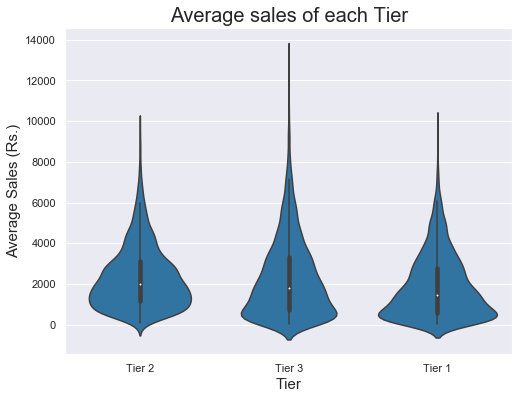

In [42]:
ax = sns.violinplot(data=sales_df, 
               x='outlet_location_type', 
               y='item_outlet_sales', 
               color=base_color, order=order);

ax = setLabels(ax, 'Tier', 'Average Sales (Rs.)', 15, 15)
ax.set_title('Average sales of each Tier', fontsize = 20);

**Observations**

1. As Tier 2 have the most items, they also have highest average sales.
2. In violin plot, we can see that Tier 3 almost touched sales of 14000 USD whereas Tier 1 and Tier 2 were below 11000 USD

### Does Tier 2 has maximum number of Large outlet size ?

The reason for Tier for having highest sales may be that they have more large outlets.

In [43]:
outlet_size_count = sales_df[['outlet_location_type', 'outlet_size', 'item_identifier']].groupby(['outlet_location_type', 'outlet_size']).count().reset_index()
outlet_size_count.item_identifier.replace(to_replace=np.nan, value=0, inplace=True)
outlet_size_count

,outlet_location_type,outlet_size,item_identifier
0,Tier 1,Small,1458.0
1,Tier 1,Medium,930.0
2,Tier 1,Large,0.0
3,Tier 2,Small,2785.0
4,Tier 2,Medium,0.0
5,Tier 2,Large,0.0
6,Tier 3,Small,555.0
7,Tier 3,Medium,1863.0
8,Tier 3,Large,932.0


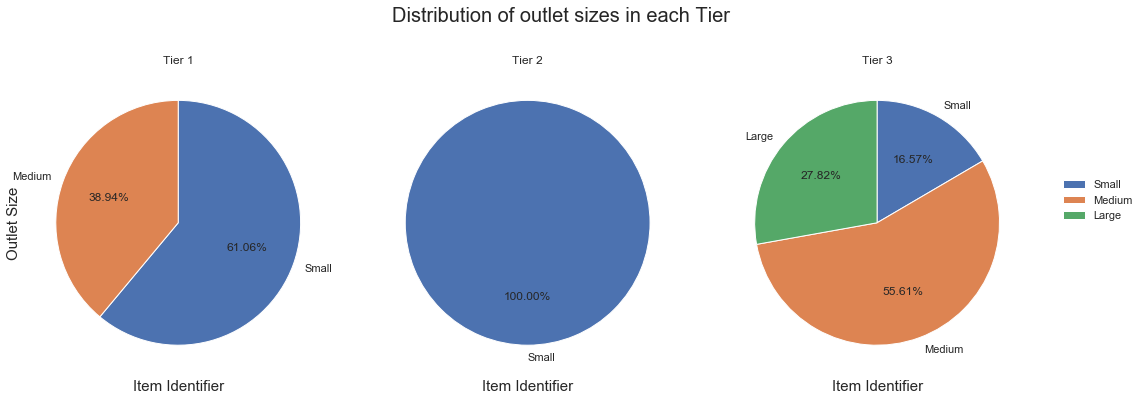

In [44]:
data = outlet_size_count.drop(outlet_size_count[outlet_size_count.item_identifier == 0].index)
g = sns.FacetGrid(data, col="outlet_location_type", height=5)

def pie(values, labels, color=None):
    plt.pie(values, labels=labels.values, autopct='%1.2f%%', counterclock=False, startangle=90)
g = (g.map(pie, 'item_identifier', 'outlet_size').add_legend())

g.set_xlabels('Item Identifier', fontsize = 15)
g.set_ylabels('Outlet Size', fontsize = 15)
g.set_titles('{col_name}', fontsize = 15)
g.fig.suptitle('Distribution of outlet sizes in each Tier', y = 1.1, fontsize = 20);

**Observations**:

- Tier 2 only had Small sized outlets yet they were able to generate highest average sales than other tier outlets
- Tier 1 have only Small and Medium sized outlets
- Tier 3 have all types of outlets
- Large outlets are available only in Tier 3

### Are Tier 2 outlets located in of Supermarket Type 1 ?

Now that Tier 2 only have Small sized outlets, maybe they are located in Supermarket Type 1

In [45]:
outlet_type_count = sales_df[['outlet_location_type', 'outlet_type', 'item_identifier']].groupby(['outlet_location_type', 'outlet_type']).count().reset_index()
outlet_type_count.item_identifier.replace(to_replace=np.nan, value=0, inplace=True)
outlet_type_count

,outlet_location_type,outlet_type,item_identifier
0,Tier 1,Grocery Store,528.0
1,Tier 1,Supermarket Type1,1860.0
2,Tier 1,Supermarket Type2,0.0
3,Tier 1,Supermarket Type3,0.0
4,Tier 2,Grocery Store,0.0
5,Tier 2,Supermarket Type1,2785.0
6,Tier 2,Supermarket Type2,0.0
7,Tier 2,Supermarket Type3,0.0
8,Tier 3,Grocery Store,555.0
9,Tier 3,Supermarket Type1,932.0


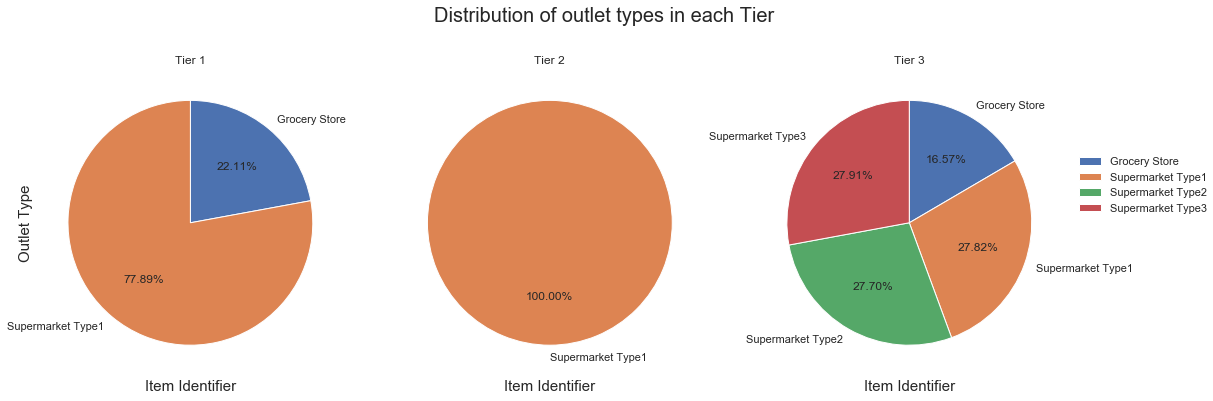

In [46]:
data = outlet_type_count.drop(outlet_type_count[outlet_type_count.item_identifier == 0].index)
g = sns.FacetGrid(data, col="outlet_location_type", height=5)

def pie(values, labels, color=None):
    colours = {'Grocery Store': 'C0',
           'Supermarket Type1': 'C1',
           'Supermarket Type2': 'C2',
           'Supermarket Type3': 'C3'}
    plt.pie(values, labels=labels.values, autopct='%1.2f%%', colors=[colours[key] for key in labels], counterclock=False, startangle=90)
g = (g.map(pie, 'item_identifier', 'outlet_type').add_legend(bbox_to_anchor = (1, 0.6)))

g.set_xlabels('Item Identifier', fontsize = 15)
g.set_ylabels('Outlet Type', fontsize = 15)
g.set_titles('{col_name}', fontsize = 15)
g.fig.suptitle('Distribution of outlet types in each Tier', y = 1.1, fontsize = 20);

**Observations**

1. Tier 1 only have Supermarket Type 1 outlets.

# Outlets

## Which outlet has generated maximum sales in 2013 ?

1. Creating a dataset with contains total sales of each outlet
2. Adding additional information such as outlet type, outlet location, outlet size
2. Adding new column of view total percent of contribution of sales by each outlet

In [47]:
outlets_info_df = sales_df.groupby('outlet_identifier').sum().reset_index().loc[:, ['outlet_identifier', 'item_outlet_sales']]
outlets_info_df

,outlet_identifier,item_outlet_sales
0,OUT010,1.883402e+05
1,OUT013,2.142664e+06
2,OUT017,2.167465e+06
3,OUT018,1.851823e+06
4,OUT019,1.796941e+05
5,OUT027,3.453926e+06
6,OUT035,2.268123e+06
7,OUT045,2.036725e+06
8,OUT046,2.118395e+06
9,OUT049,2.183970e+06


In [48]:
outlets_info_df[['outlet_size', 
                 'outlet_location_type', 
                 'outlet_type']] = sales_df.drop_duplicates('outlet_identifier')\
                                        .sort_values('outlet_identifier')\
                                        .reset_index()\
                                        .loc[:, ['outlet_size', 'outlet_location_type', 'outlet_type']]
outlets_info_df

,outlet_identifier,item_outlet_sales,outlet_size,outlet_location_type,outlet_type
0,OUT010,1.883402e+05,Small,Tier 3,Grocery Store
1,OUT013,2.142664e+06,Large,Tier 3,Supermarket Type1
2,OUT017,2.167465e+06,Small,Tier 2,Supermarket Type1
3,OUT018,1.851823e+06,Medium,Tier 3,Supermarket Type2
4,OUT019,1.796941e+05,Small,Tier 1,Grocery Store
5,OUT027,3.453926e+06,Medium,Tier 3,Supermarket Type3
6,OUT035,2.268123e+06,Small,Tier 2,Supermarket Type1
7,OUT045,2.036725e+06,Small,Tier 2,Supermarket Type1
8,OUT046,2.118395e+06,Small,Tier 1,Supermarket Type1
9,OUT049,2.183970e+06,Medium,Tier 1,Supermarket Type1


### Sales of each outlet by outlet type

In [49]:
# to view total contribution of each outlet
item_outlet_sales_total = outlets_info_df.item_outlet_sales.sum()
outlets_info_df['percent_contrib'] = outlets_info_df.item_outlet_sales / item_outlet_sales_total * 100
outlets_info_df

,outlet_identifier,item_outlet_sales,outlet_size,outlet_location_type,outlet_type,percent_contrib
0,OUT010,1.883402e+05,Small,Tier 3,Grocery Store,1.013065
1,OUT013,2.142664e+06,Large,Tier 3,Supermarket Type1,11.525196
2,OUT017,2.167465e+06,Small,Tier 2,Supermarket Type1,11.658602
3,OUT018,1.851823e+06,Medium,Tier 3,Supermarket Type2,9.960789
4,OUT019,1.796941e+05,Small,Tier 1,Grocery Store,0.966558
5,OUT027,3.453926e+06,Medium,Tier 3,Supermarket Type3,18.578359
6,OUT035,2.268123e+06,Small,Tier 2,Supermarket Type1,12.200030
7,OUT045,2.036725e+06,Small,Tier 2,Supermarket Type1,10.955364
8,OUT046,2.118395e+06,Small,Tier 1,Supermarket Type1,11.394658
9,OUT049,2.183970e+06,Medium,Tier 1,Supermarket Type1,11.747378


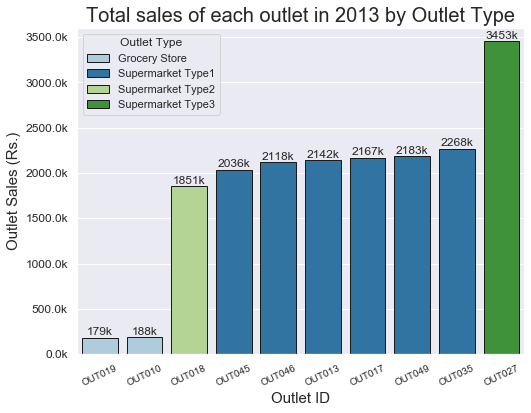

In [50]:
# Creating bar plot
ax = sns.barplot(data=outlets_info_df, 
                 x='outlet_identifier', y='item_outlet_sales', 
                 hue = 'outlet_type', dodge = False,
                 palette='Paired',
                 edgecolor=".1", linewidth=1, 
                 order=outlets_info_df.sort_values('item_outlet_sales')['outlet_identifier'])

ax = countplotDataLabels(ax, scale='k', adjust_label_h=30000)

# setting x and y axis labels and title
ax = setLabels(ax, 'Outlet ID', 'Outlet Sales (Rs.)', 15, 15)
ax.set_title('Total sales of each outlet in 2013 by Outlet Type', fontsize = 20)
ax.legend(loc='upper left').set_title('Outlet Type')

# changing size of x and y labels
ax.tick_params(axis="x", labelsize=10)
ax.tick_params(axis="y", labelsize=12)

# increasing ylim so that the data label is inside the figure
plt.ylim(0, 3600000)

plt.xticks(rotation=25)
plt.show()

- **Key Findings:** 

    - **Supermarket Type 3 > Supermarket Type 1 > Supermarket Type 2 > Grocery Store**


- **Observations**

    - Outlet 19 an 10 
        - Both contributed around 1 percent each
        - Both are Grocery Stores
    - Outlet 18
        - The only Supermarket Type 2 type outlet
        - Contributed 10% it overall sales in 2013
    - Outlet 45, 46, 13, 17, 49, 35
        - Had 11-12% contribution
        - All outlets are Supermarket Type 1
    - Outlet 27
        - Had the highest contribution of 18%
        - Is of Supermarket Type 3

**To further investigate**

1. Why was sales of Supermarket Type 1 less than that of Supermarket Type 2

### Sales of each outlet by outlet location type

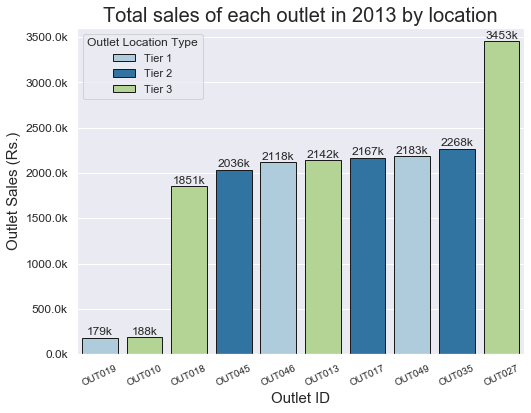

In [51]:
ax = sns.barplot(data=outlets_info_df, 
                 x='outlet_identifier', y='item_outlet_sales', 
                 hue = 'outlet_location_type', dodge = False,
                 palette='Paired',
                 edgecolor=".1", linewidth=1, 
                 order=outlets_info_df.sort_values('item_outlet_sales')['outlet_identifier'])

ax = countplotDataLabels(ax, scale='k', adjust_label_h=30000)

# setting x and y axis labels and title
ax = setLabels(ax, 'Outlet ID', 'Outlet Sales (Rs.)', 15, 15)
ax.set_title('Total sales of each outlet in 2013 by location', fontsize = 20)
ax.legend(loc='upper left').set_title('Outlet Location Type')

# changing size of x and y labels
ax.tick_params(axis="x", labelsize=10)
ax.tick_params(axis="y", labelsize=12)

# increasing ylim so that the data label is inside the figure
plt.ylim(0, 3600000)

plt.xticks(rotation=25)
plt.show()

**Observations**

- Outlets in Tier 2 location had 10% - 12% sales
- Tier 1 outlets gave strong competition with outlets in Tier 2 and Tier 3
- Although outlet 10 is in Tier 3 region, it still generated just 1% of total sales in 2013
- The highest sales (outlet 27) is generated by Tier 3 outlet

**To futher investigate**

1. Why Tier 3 outlets didn't show consistency in generating sales
2. How did Tier 1 outlets manage to compete with Tier 2 outlets

### Sales of each outlet by outlet size

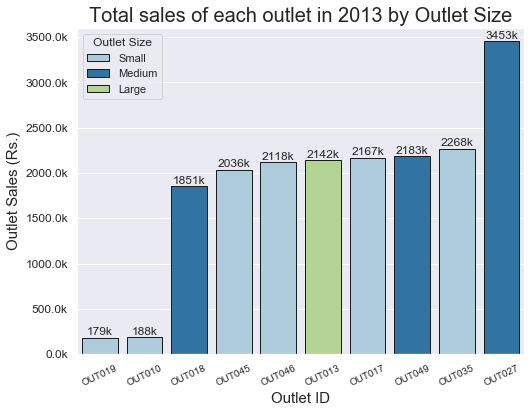

In [52]:
ax = sns.barplot(data=outlets_info_df, 
                 x='outlet_identifier', y='item_outlet_sales', 
                 hue = 'outlet_size', dodge = False,
                 palette='Paired',
                 edgecolor=".1", linewidth=1, 
                 order=outlets_info_df.sort_values('item_outlet_sales')['outlet_identifier'])

ax = countplotDataLabels(ax, scale='k', adjust_label_h=30000)

# setting x and y axis labels and title
ax = setLabels(ax, 'Outlet ID', 'Outlet Sales (Rs.)', 15, 15)
ax.set_title('Total sales of each outlet in 2013 by Outlet Size', fontsize = 20)
ax.legend(loc='upper left').set_title('Outlet Size')

# changing size of x and y labels
ax.tick_params(axis="x", labelsize=10)
ax.tick_params(axis="y", labelsize=12)

# increasing ylim so that the data label is inside the figure
plt.ylim(0, 3600000)

plt.xticks(rotation=25)
plt.show()



**Observations**

- Although Outlet 13 is of Large size, it still generated the sales in 11% - 12% 
- Medium size outlets generated 11% - 12% sales. Even the max sales of 18% is generated by Medium size outlet
- Small sized outlets too showed potentital in generating reasonable sales

**To further investigate**

1. How did a medium size outlet (Outlet 27) was able to generated maximum sales?
2. Outlet 13 which is a large size outlet still didn't manage to generate maximum sales.
3. How did small size outlets even manage to generate 11% - 12% sales and compete with medium size outlets

## What is the price range in each outlet for various products?

This will even help to know is any outlet from specific location or tier, specific size had visible price difference

- Plotting a boxplot to view the price range of each outlet
- Adding hue of outlet_type to add additional info of which type of outlet it is

Hint: Use `dodge=False` if the size of boxplots shrinks while using hue or changing orient

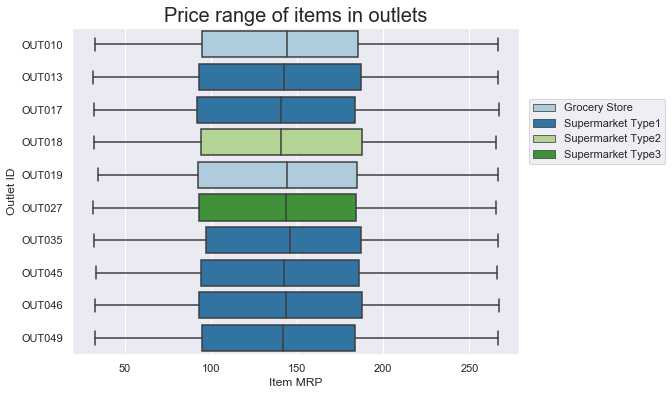

In [53]:
ax = sns.boxplot(data=sales_df, 
            y='outlet_identifier', 
            x='item_mrp', 
            order=outlets_info_df.set_index('outlet_identifier').index, 
            orient="h", 
            hue='outlet_type', 
            dodge=False, palette='Paired');

# position the legend
ax.legend(loc='upper right', bbox_to_anchor=(1.34, 0.8));

ax = setLabels(ax, 'Item MRP', "Outlet ID")
ax.set_title('Price range of items in outlets', fontsize = 20);

**Observation**

- Although the sales were different for various outlets, all the outlets have nearly the same price range

## As the price range is same for each outlet, maybe we find our answers in total items sold by outlets

**TODO**: Adding total_items_sold column in outlets_info_df

In [54]:
outlets_info_df['total_items_sold'] = sales_df.groupby('outlet_identifier').sum().reset_index()['total_items_sold']
outlets_info_df

,outlet_identifier,item_outlet_sales,outlet_size,outlet_location_type,outlet_type,percent_contrib,total_items_sold
0,OUT010,1.883402e+05,Small,Tier 3,Grocery Store,1.013065,1323
1,OUT013,2.142664e+06,Large,Tier 3,Supermarket Type1,11.525196,14910
2,OUT017,2.167465e+06,Small,Tier 2,Supermarket Type1,11.658602,15427
3,OUT018,1.851823e+06,Medium,Tier 3,Supermarket Type2,9.960789,12859
4,OUT019,1.796941e+05,Small,Tier 1,Grocery Store,0.966558,1292
5,OUT027,3.453926e+06,Medium,Tier 3,Supermarket Type3,18.578359,24883
6,OUT035,2.268123e+06,Small,Tier 2,Supermarket Type1,12.200030,15779
7,OUT045,2.036725e+06,Small,Tier 2,Supermarket Type1,10.955364,14467
8,OUT046,2.118395e+06,Small,Tier 1,Supermarket Type1,11.394658,15054
9,OUT049,2.183970e+06,Medium,Tier 1,Supermarket Type1,11.747378,15472


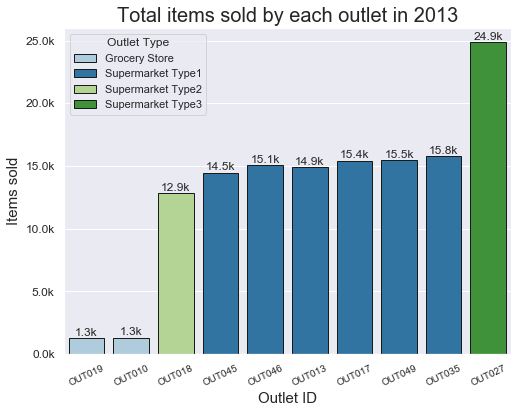

In [55]:
ax = sns.barplot(data=outlets_info_df, 
                 x='outlet_identifier', y='total_items_sold', 
                 hue = 'outlet_type', dodge = False,
                 palette='Paired',
                 edgecolor=".1", linewidth=1, 
                 order=outlets_info_df.sort_values('item_outlet_sales')['outlet_identifier'])

ax = countplotDataLabels(ax, scale='k', adjust_label_h=200, keep_decimals=1)

# setting x and y axis labels and title
ax = setLabels(ax, 'Outlet ID', 'Items sold', 15, 15)
ax.set_title('Total items sold by each outlet in 2013', fontsize = 20)
ax.legend(loc='upper left').set_title('Outlet Type')

# changing size of x and y labels
ax.tick_params(axis="x", labelsize=10)
ax.tick_params(axis="y", labelsize=12)

# increasing ylim so that the data label is inside the figure
plt.ylim(0, 26000)

plt.xticks(rotation=25)
plt.show()

**Observations**
- As Supermarket Type 2 has less products than Supermarket Type 1, they generated less sales than Supermarket Type 1.
- As the price range is similar in all the outlets, sales is highly dependent on the total items sold

## Are Outlet 19 and 10 newly established? 

There may be a chance that those outlets are recently established due to which they are not able to generate maximum sales

**TODO:** Add outlet_establishment_year column in outlets_info_df

In [56]:
outlets_info_df['outlet_establishment_year'] = sales_df.drop_duplicates('outlet_identifier').sort_values('outlet_identifier').reset_index()['outlet_establishment_year']
outlets_info_df['years_since_establishment'] = 2013 + 1 - outlets_info_df['outlet_establishment_year']
outlets_info_df

,outlet_identifier,item_outlet_sales,outlet_size,outlet_location_type,outlet_type,percent_contrib,total_items_sold,outlet_establishment_year,years_since_establishment
0,OUT010,1.883402e+05,Small,Tier 3,Grocery Store,1.013065,1323,1998,16
1,OUT013,2.142664e+06,Large,Tier 3,Supermarket Type1,11.525196,14910,1987,27
2,OUT017,2.167465e+06,Small,Tier 2,Supermarket Type1,11.658602,15427,2007,7
3,OUT018,1.851823e+06,Medium,Tier 3,Supermarket Type2,9.960789,12859,2009,5
4,OUT019,1.796941e+05,Small,Tier 1,Grocery Store,0.966558,1292,1985,29
5,OUT027,3.453926e+06,Medium,Tier 3,Supermarket Type3,18.578359,24883,1985,29
6,OUT035,2.268123e+06,Small,Tier 2,Supermarket Type1,12.200030,15779,2004,10
7,OUT045,2.036725e+06,Small,Tier 2,Supermarket Type1,10.955364,14467,2002,12
8,OUT046,2.118395e+06,Small,Tier 1,Supermarket Type1,11.394658,15054,1997,17
9,OUT049,2.183970e+06,Medium,Tier 1,Supermarket Type1,11.747378,15472,1999,15


**Observations**

**Interesting finding:** Outlet 19 and 27 are the oldest outlets. They are operating since 29 years. However, Outlet 19 generated least sales and Outlet 27 generated maximum sales

- Outlet 10 is 16 years old.

## What food types are sold per outlet ?

Finding out whether any outlet focuses on particular type of item or not

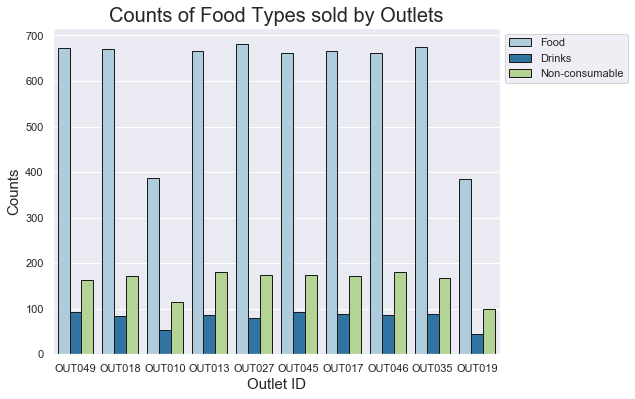

In [57]:
ax = sns.countplot(data=sales_df, x='outlet_identifier', hue='food_type', palette='Paired', edgecolor='0.1')
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1))
ax = setLabels(ax, 'Outlet ID', 'Counts', 15, 15)
ax.set_title('Counts of Food Types sold by Outlets', fontsize = 20);

**Observations**

Type of items sold by outlets: Food > Non-Consumable > Drinks

# Items

## Is there any notable difference in item weight, item mrp and item visibility ? 

**Item Weight**

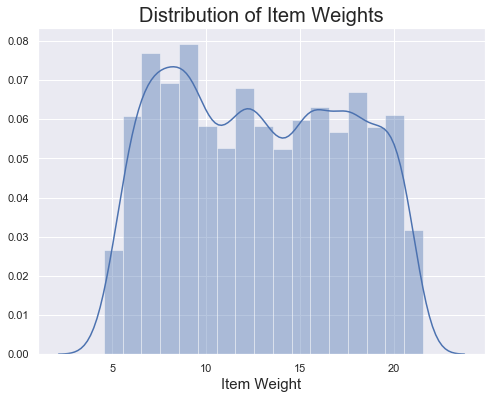

In [58]:
ax = sns.distplot(sales_df.item_weight, bins=np.arange(sales_df.item_weight.min(), sales_df.item_weight.max() + 1, 1));
ax.set_xlabel('Item Weight', fontsize = 15)
ax.set_title('Distribution of Item Weights', fontsize = 20);

**Observations**

1. Apart from the lowest and the higest weight, most of the weights have distribution between 0.05 to 0.07

**Item visibility**

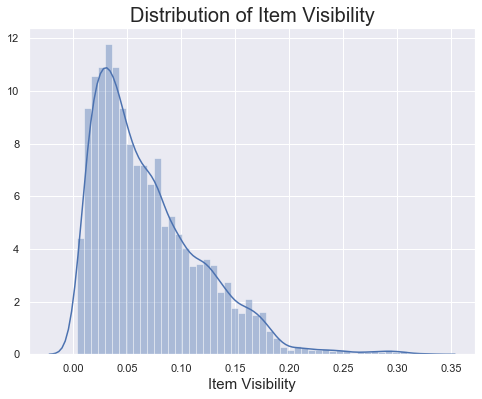

In [59]:
bins = np.arange(0, sales_df.item_visibility.max() + 0.05, 0.05)
ax = sns.distplot(a=sales_df.item_visibility)
ax.set_xlabel('Item Visibility', fontsize = 15)
ax.set_title('Distribution of Item Visibility', fontsize = 20);

**Observations**
1. Most of the items have visibility between 0.02 to 0.05
2. Vew few items have visibility of more than 0.20 

**Item MRP**

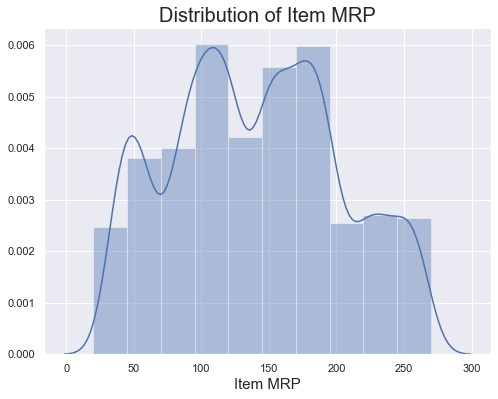

In [60]:
bins = np.arange(20, sales_df.item_mrp.max() + 25, 25)
ax = sns.distplot(sales_df.item_mrp, bins=bins);

ax.set_xlabel('Item MRP', fontsize = 15)
ax.set_title('Distribution of Item MRP', fontsize = 20);

**Observation**

- Most of the items are within the rnge of 50 to 200
- The proportion of items above 200 MRP is equal.

## How many food types are available in all the outlets ?


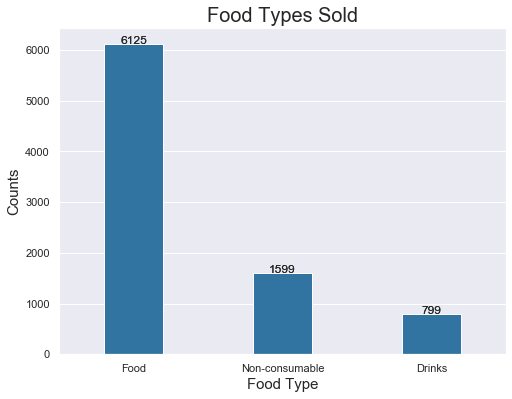

In [61]:
plt.figure(figsize=(8, 6))
ax = sns.countplot(data=sales_df, x='food_type', color=base_color, order=sales_df.food_type.value_counts().index)
ax = countplotDataLabels(ax)
ax = setLabels(ax, 'Food Type', 'Counts', 15, 15)
ax.set_title('Food Types Sold', fontsize = 20)
ax = changeBarWidth(ax, 0.4)

**Observations**

1. Food products are sold the most whereas drinks are sold the least.

**Fat Content**

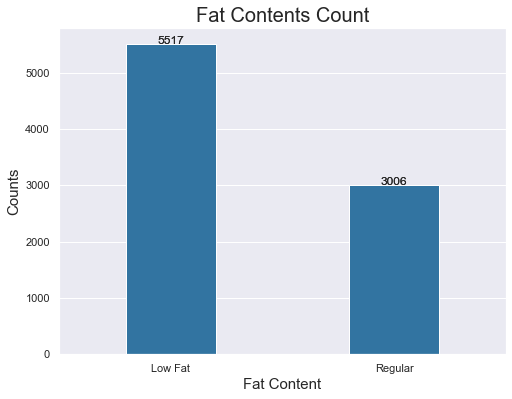

In [62]:
ax = sns.countplot(data=sales_df, x='item_fat_content', color=base_color)
ax = countplotDataLabels(ax)
ax = setLabels(ax, 'Fat Content', 'Counts', 15, 15)
ax.set_title('Fat Contents Count', fontsize = 20)
ax = changeBarWidth(ax, 0.4)

**Observations**

Mostly the products are of Low Fat content

## Is average MRP different in different Tiers?

Viewing distribution of MRP

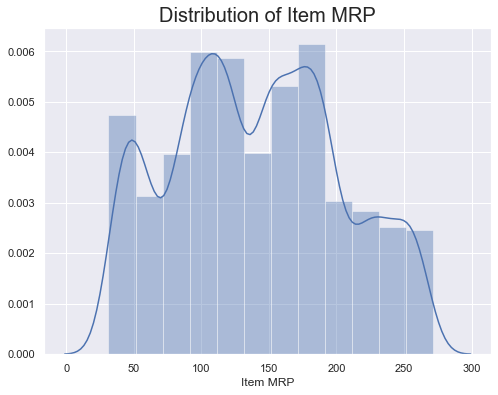

In [63]:
bins = np.arange(sales_df.item_mrp.min(), sales_df.item_mrp.max() + 20, 20)
ax = sns.distplot(sales_df.item_mrp, bins=bins)
ax.set_xlabel('Item MRP')
ax.set_title('Distribution of Item MRP', fontsize = 20);

Viewing distribution in each Tier to get better info on distribution

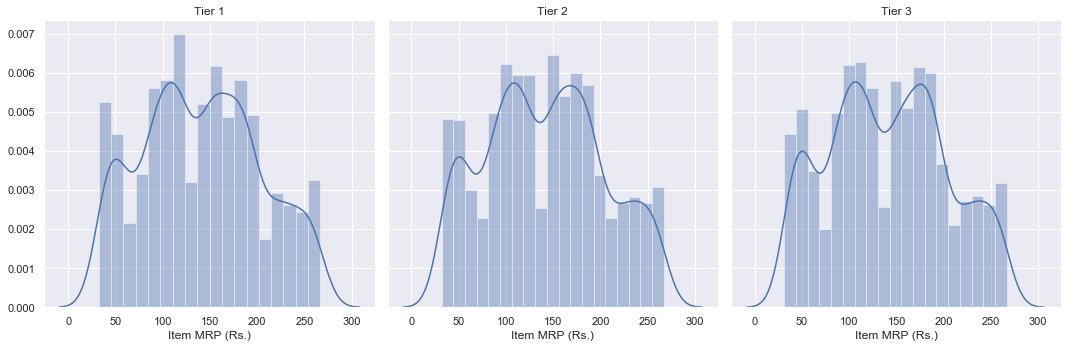

In [64]:
g = sns.FacetGrid(data=sales_df, col='outlet_location_type', height=5)
g.map(sns.distplot, 'item_mrp')
g.set_xlabels('Item MRP (Rs.)')
g.set_titles('{col_name}')

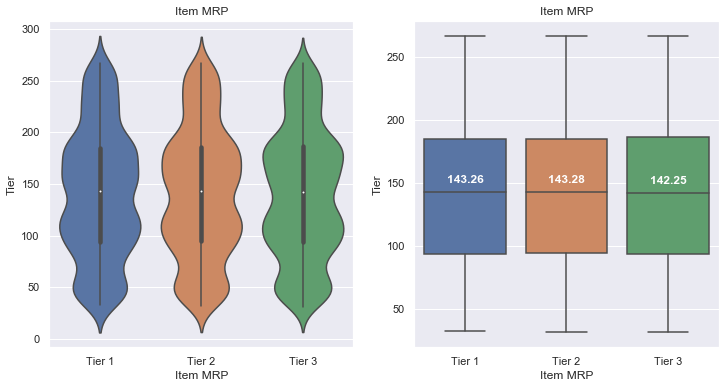

In [65]:
fig, axes = plt.subplots(1,2,figsize=(12, 6))
ax1 = sns.violinplot(data=sales_df, x='outlet_location_type', y='item_mrp', ax=axes[0])
ax2 = sns.boxplot(data=sales_df, x='outlet_location_type', y='item_mrp', ax=axes[1])
axes[0].set_title('Item MRP')
axes[1].set_title('Item MRP')

for ax in axes.flat:
    ax.set(xlabel='Item MRP', ylabel='Tier')


medians = np.round(sales_df.groupby('outlet_location_type').median()['item_mrp'].values, 2)
vertical_offset = sales_df['item_mrp'].median() * 0.05

for xtick in ax2.get_xticks():
    ax2.text(xtick, medians[xtick] + vertical_offset, medians[xtick], 
            horizontalalignment='center',fontsize=12,color='w',weight='semibold')
    

**Observations**

1. The price range is almost similar in all the tiers which shows the competence in these tiers.

## Which item generated max sales in each outlets ?

In [66]:
# getting id of rows with max outlet item sales for each outlet
idx = sales_df.groupby('outlet_identifier')['item_outlet_sales'].transform(max) == sales_df['item_outlet_sales']
sales_df[idx].sort_values('item_mrp')

,item_identifier,item_weight,item_fat_content,item_visibility,item_type,item_mrp,outlet_identifier,outlet_establishment_year,outlet_size,outlet_location_type,outlet_type,item_outlet_sales,total_items_sold,mrp_per_gram,food_type,operating_years
8353,NCX41,19.000,Low Fat,0.031024,Health and Hygiene,210.5244,OUT019,1985,Small,Tier 1,Grocery Store,1482.0708,7,11.080232,Non-consumable,29
7188,NCE42,21.100,Low Fat,0.010551,Household,234.9958,OUT027,1985,Medium,Tier 3,Supermarket Type3,13086.9648,56,11.137242,Non-consumable,29
7759,NCK30,14.850,Low Fat,0.102066,Household,254.2698,OUT010,1998,Small,Tier 3,Grocery Store,1775.6886,7,17.122545,Non-consumable,16
4961,FDK03,12.600,Regular,0.074339,Dairy,255.5356,OUT017,2007,Small,Tier 2,Supermarket Type1,9664.7528,38,20.280603,Food,7
8039,FDY55,16.750,Low Fat,0.081485,Fruits and Vegetables,258.0988,OUT045,2002,Small,Tier 2,Supermarket Type1,8994.9580,35,15.408884,Food,12
43,FDC02,21.350,Low Fat,0.069103,Canned,259.9278,OUT018,2009,Medium,Tier 3,Supermarket Type2,6768.5228,26,12.174604,Food,5
4888,FDF39,14.850,Regular,0.019495,Dairy,261.2910,OUT013,1987,Large,Tier 3,Supermarket Type1,10256.6490,39,17.595354,Food,27
4289,NCM05,6.825,Low Fat,0.059847,Health and Hygiene,262.5226,OUT046,1997,Small,Tier 1,Supermarket Type1,9779.9362,37,38.464850,Non-consumable,17
1506,FDB15,10.895,Low Fat,0.137023,Dairy,263.7568,OUT049,1999,Medium,Tier 1,Supermarket Type1,7646.0472,29,24.208977,Food,15
5752,FDI15,13.800,Low Fat,0.141326,Dairy,265.0884,OUT035,2004,Small,Tier 2,Supermarket Type1,8479.6288,32,19.209304,Food,10


**Observations**

1. The items with gave the maximum sales were in the price range of 210 to 265
2. The item visibility is also higher in most of the outlets (between 0.06 to 0.1) than other products as seen before.
3. No drinks was in this list, only Food and Non-consumable
4. Most of the items are in the range of 25 to 40
5. Outlet 27 made the maximum sales of 13086 by selling 56 items 
6. Outlet 10 and 19 sold the least items, 7 each.

## Relation between items mrp and item visibility

Finding if items with higher visibility have higher price or not.

**General comparison**

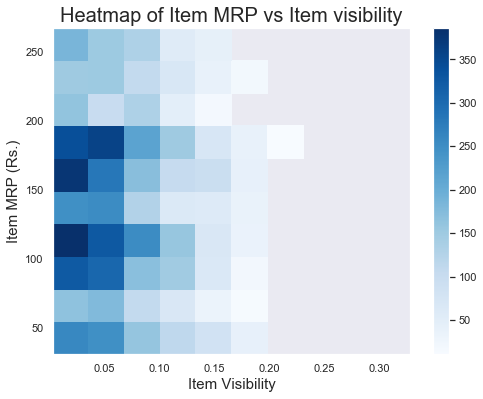

In [67]:
plt.hist2d(data=sales_df, x = 'item_visibility', y = 'item_mrp', cmap='Blues', cmin=10);
plt.colorbar();
plt.title('Heatmap of Item MRP vs Item visibility', fontsize = 20);
plt.xlabel('Item Visibility', fontsize = 15);
plt.ylabel('Item MRP (Rs.)', fontsize = 15);

**Observation**

1. Most of the items with visibility between 0.00 to 0.10 have mrp range of 100 to 200
2. When we keep limit minimum of 10 items in each heatmap block, we can see that there are hardly any items with more than 0.20 visibility.

**Comparison by Tier and Outlet type**

Having a deeper look in the item MRP and visiblity relations using FacetGrid to view relations in each Tier and Outlet Type

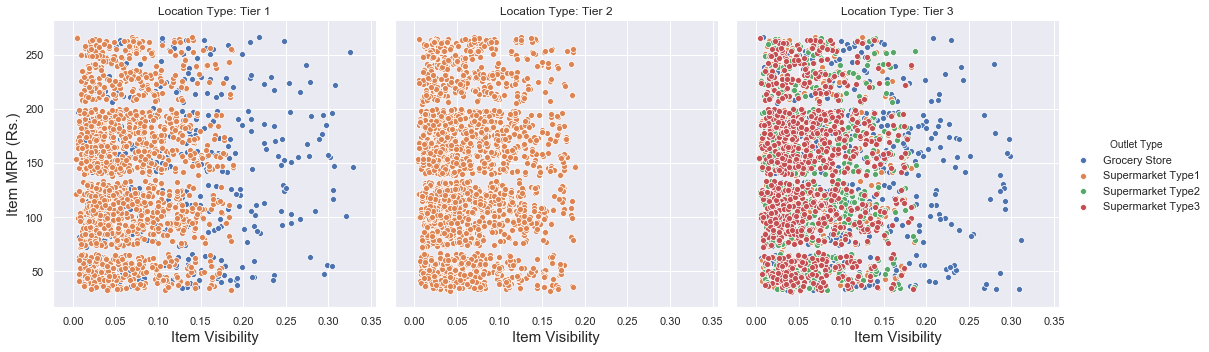

In [68]:
g = sns.FacetGrid(data=sales_df, 
                  col='outlet_location_type', 
                  hue='outlet_type', 
                  height=5)
g.map(sns.scatterplot, 'item_visibility', 'item_mrp')
g.add_legend(title='Outlet Type')

g.set_titles(col_template='Location Type: {col_name}', fontsize=20)

g.set_xlabels('Item Visibility', fontsize = 15)
g.set_ylabels('Item MRP (Rs.)', fontsize = 15);

**Observations**

1. Supermarkets have item visibility range from 0.00 to 0.20. None of the products cross 0.20.
2. Only Grocery Stores have item visibility range from 0.00 to 0.33. They are the only outlets which have item visibility above 0.20 to 0.33.

## Relation between total item sold and total sales

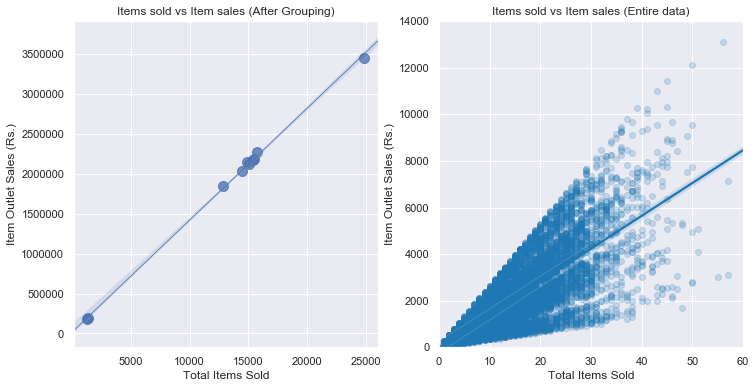

In [69]:
fig, axes = plt.subplots(1,2, figsize=(12, 6))

ax1 = sns.regplot(data=outlets_info_df, 
            x='total_items_sold', y='item_outlet_sales', 
            scatter_kws={"s": 100}, line_kws={'linewidth' : .8}, ax=axes[0])


ax2 = sns.regplot(data=sales_df, y='item_outlet_sales', x='total_items_sold', scatter_kws={'alpha':.2}, ax=axes[1], color=base_color)
ax2.set_xlim(0, 60);
ax2.set_ylim(0, 14000);

ax1 = setLabels(ax1, 'Total Items Sold', 'Item Outlet Sales (Rs.)');
ax1.set_title('Items sold vs Item sales (After Grouping)');

ax2 = setLabels(ax2, 'Total Items Sold', 'Item Outlet Sales (Rs.)');
ax2.set_title('Items sold vs Item sales (Entire data)');

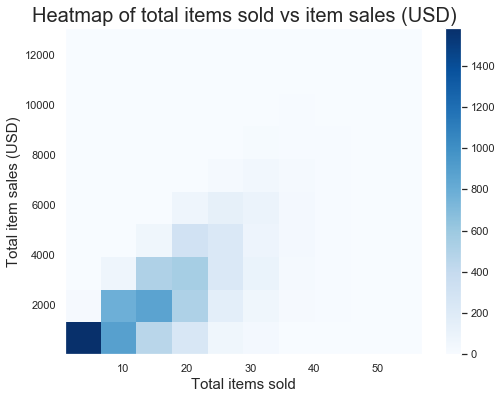

In [70]:
plt.hist2d(data=sales_df, x = 'total_items_sold', y = 'item_outlet_sales', cmap='Blues')
plt.xlabel('Total items sold', fontsize = 15)
plt.ylabel('Total item sales (USD)', fontsize = 15)
plt.title('Heatmap of total items sold vs item sales (USD)', fontsize = 20)
plt.colorbar();

In [71]:
sales_df[['total_items_sold', 'item_outlet_sales']].corr()

,total_items_sold,item_outlet_sales
total_items_sold,1.00000,0.75934
item_outlet_sales,0.75934,1.00000


**Observations**

1. We can see a correlation of 0.75 between total items sold and total sales of each outlet

2. As we saw that the price range was almost same for each outlets, the total items sold showed a linear relationship with total sales.

## Relation between Item MRP and Item Outlet Sales

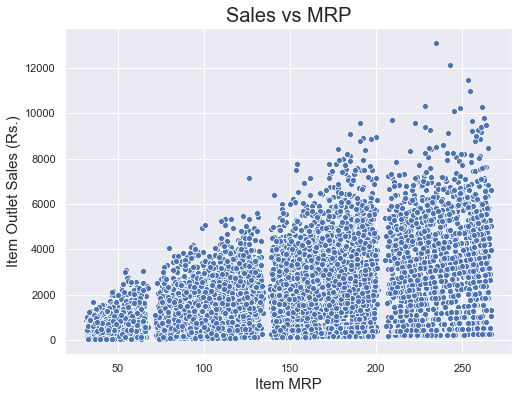

In [72]:
ax = sns.scatterplot(data=sales_df, x='item_mrp', y='item_outlet_sales')
ax = setLabels(ax, 'Item MRP', 'Item Outlet Sales (Rs.)', 15, 15)
ax.set_title('Sales vs MRP', fontsize = 20);

**Observations**

1. Only item with higher mrp have been able to generate maximum sales
2. There is a trend that product with lower mrp aren't able to cross certain threshold.

**Having a detailed insights using FacetGrid on Tier and outlet type**

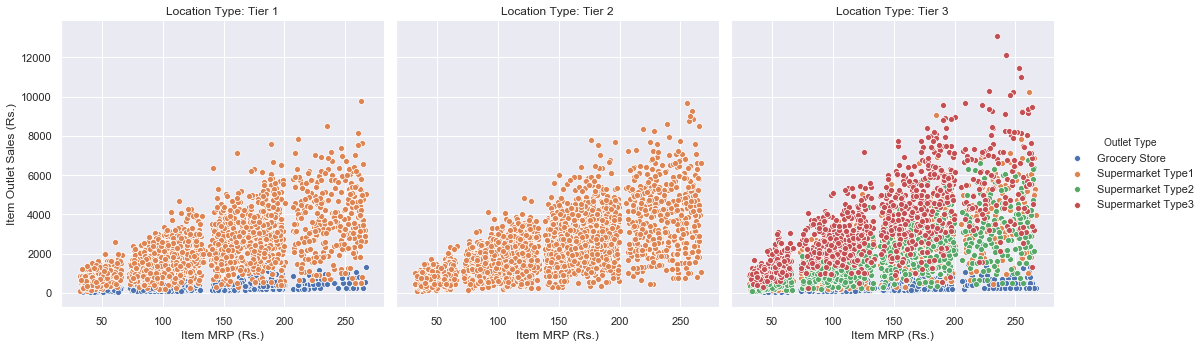

In [73]:
g = sns.FacetGrid(data=sales_df, col='outlet_location_type', hue='outlet_type', height=5)
g.map(sns.scatterplot, 'item_mrp', 'item_outlet_sales')
g.add_legend(title='Outlet Type')

g.set_titles(col_template='Location Type: {col_name}')

g.set_xlabels('Item MRP (Rs.)')
g.set_ylabels('Item Outlet Sales (Rs.)');

**Observations**

1. Outlets types by their threhold in sales in descending order:
    - Supermarket Type 3 > Supermarket Type 1 > Supermarket Type 2 > Grocery Store

##  Which type of items are sold the most

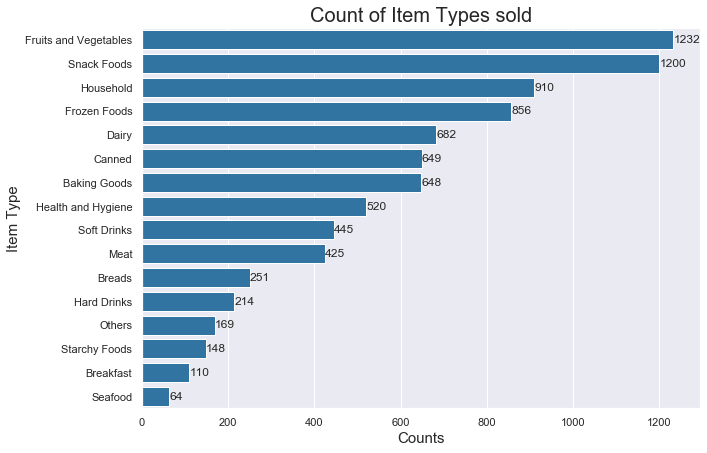

In [74]:
plt.figure(figsize=(10, 7))
ax = sns.countplot(data=sales_df, y='item_type', order=sales_df.item_type.value_counts().index, color=base_color)
ax = countplotDataLabels(ax, orient='h')
ax = setLabels(ax, 'Counts', 'Item Type', 15, 15)
ax.set_title('Count of Item Types sold', fontsize = 20);

In [75]:
top_sold_item = sales_df[sales_df.item_type == 'Fruits and Vegetables'].groupby('outlet_identifier').sum().reset_index()[['outlet_identifier', 'item_outlet_sales']]
top_sold_item.columns = ['outlet_identifier', 'fruits_and_vegs']
top_sold_item['snack_foods'] = sales_df[sales_df.item_type == 'Snack Foods'].groupby('outlet_identifier').sum().reset_index()[['item_outlet_sales']]

top_sold_item['all_sales'] = sales_df.groupby('outlet_identifier').sum().reset_index()['item_outlet_sales']

top_sold_item['fruits_and_vegs_ratio'] = top_sold_item['fruits_and_vegs'] / top_sold_item['all_sales'] * 100
top_sold_item['snack_foods_ratio'] = top_sold_item['snack_foods'] / top_sold_item['all_sales'] * 100

top_sold_item

,outlet_identifier,fruits_and_vegs,snack_foods,all_sales,fruits_and_vegs_ratio,snack_foods_ratio
0,OUT010,24548.0460,25942.8970,1.883402e+05,13.033887,13.774489
1,OUT013,341526.7706,309246.1234,2.142664e+06,15.939356,14.432789
2,OUT017,319504.1040,311071.0812,2.167465e+06,14.740910,14.351837
3,OUT018,263471.7076,278714.5328,1.851823e+06,14.227695,15.050821
4,OUT019,24054.0224,25653.2740,1.796941e+05,13.386095,14.276081
5,OUT027,576028.1886,513088.1172,3.453926e+06,16.677490,14.855214
6,OUT035,304647.4428,355573.8190,2.268123e+06,13.431699,15.677008
7,OUT045,326414.4422,288438.5418,2.036725e+06,16.026433,14.161876
8,OUT046,304751.3076,274813.6106,2.118395e+06,14.385952,12.972726
9,OUT049,335113.7850,350244.0900,2.183970e+06,15.344250,16.037039


In [76]:
others_sum = top_sold_item.fruits_and_vegs_ratio.mean() + top_sold_item.snack_foods_ratio.mean()
outlets_top_sales = pd.DataFrame(data = {
    'item_type' : ['Fruits and Vegetables', 'Snack Foods', 'Others'],
    'total_contribution' : [top_sold_item.fruits_and_vegs_ratio.mean(), top_sold_item.snack_foods_ratio.mean(), 100 - others_sum]
})
outlets_top_sales

,item_type,total_contribution
0,Fruits and Vegetables,14.719377
1,Snack Foods,14.558988
2,Others,70.721635


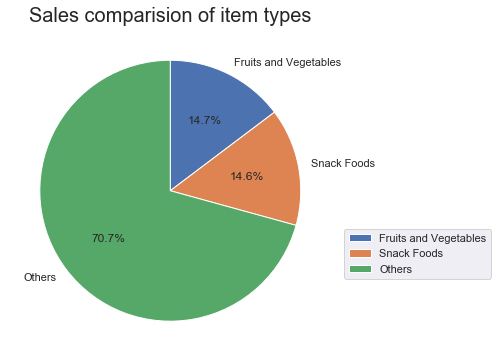

In [77]:
plt.pie(outlets_top_sales.total_contribution, labels=outlets_top_sales.item_type, autopct='%1.1f%%', counterclock=False, startangle=90);
plt.title('Sales comparision of item types', fontsize = 20)
plt.legend(outlets_top_sales.item_type, bbox_to_anchor=(1.5, 0.4));

**Observations**
1.	Fruits and Vegetables are the most sold items (1232) followed by Snack Foods (1200).
2.	Dairy items sold were half to Fruits and Vegetables (682)
3. 29% sales is generated by Fruits and Vegetables and Snack Foods. Having them in a new store is a good idea to invest.

## Which items are only available in the outlet with most sales (Outlet 27) 

TODO: Create two datasets, 1st of outlet 27 and 2nd of all other outlets and perform left join

In [78]:
outlet_27 = sales_df[sales_df.outlet_identifier == 'OUT027']
other_outlets = sales_df[sales_df.outlet_identifier != 'OUT027']

In [79]:
pd.merge(outlet_27, other_outlets.drop_duplicates()['item_identifier'], how='left', on='item_identifier', indicator=True).loc[lambda x : x['_merge']=='left_only']

,item_identifier,item_weight,item_fat_content,item_visibility,item_type,item_mrp,outlet_identifier,outlet_establishment_year,outlet_size,outlet_location_type,outlet_type,item_outlet_sales,total_items_sold,mrp_per_gram,food_type,operating_years,_merge
553,FDN52,12.578974,Regular,0.130933,Frozen Foods,86.9198,OUT027,1985,Medium,Tier 3,Supermarket Type3,1569.9564,18,6.909927,Food,29,left_only
1056,FDK57,13.044619,Low Fat,0.079904,Snack Foods,120.0440,OUT027,1985,Medium,Tier 3,Supermarket Type3,4434.2280,37,9.202568,Food,29,left_only
2196,FDE52,13.712074,Regular,0.029742,Dairy,88.9514,OUT027,1985,Medium,Tier 3,Supermarket Type3,3453.5046,39,6.487086,Food,29,left_only


**Observations**

1. They have only 3 items which are not available in other outlets.
2. These items haven't made a significant contribution to total sales of the outlet

## Items which are available only in Supermarket Type 1

In [80]:
supermarket1 = sales_df[sales_df.outlet_type == 'Supermarket Type1']
non_supermarket1 = sales_df[sales_df.outlet_type != 'Supermarket Type1']

unique_items_supermarket1 = pd.merge(supermarket1, non_supermarket1.item_identifier, how='left', on='item_identifier', indicator=True).loc[lambda x : x['_merge']=='left_only']
unique_items_supermarket1

,item_identifier,item_weight,item_fat_content,item_visibility,item_type,item_mrp,outlet_identifier,outlet_establishment_year,outlet_size,outlet_location_type,outlet_type,item_outlet_sales,total_items_sold,mrp_per_gram,food_type,operating_years,_merge
63,FDM40,10.195,Low Fat,0.159804,Frozen Foods,141.5154,OUT013,1987,Large,Tier 3,Supermarket Type1,850.8924,6,13.880863,Food,27,left_only
134,FDT28,13.300,Low Fat,0.063695,Frozen Foods,151.0708,OUT045,2002,Small,Tier 2,Supermarket Type1,1805.6496,12,11.358707,Food,12,left_only
184,NCO26,7.235,Low Fat,0.076856,Household,116.0492,OUT046,1997,Small,Tier 1,Supermarket Type1,1969.4364,17,16.039972,Non-consumable,17,left_only
201,FDB11,16.000,Low Fat,0.060837,Starchy Foods,226.8404,OUT035,2004,Small,Tier 2,Supermarket Type1,6301.1312,28,14.177525,Food,10,left_only
206,NCO26,7.235,Low Fat,0.076841,Household,117.5492,OUT035,2004,Small,Tier 2,Supermarket Type1,1969.4364,17,16.247298,Non-consumable,10,left_only
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10722,FDM38,5.885,Regular,0.092771,Canned,54.1982,OUT046,1997,Small,Tier 1,Supermarket Type1,999.3658,18,9.209550,Food,17,left_only
10756,FDV44,8.365,Regular,0.039837,Fruits and Vegetables,191.6188,OUT035,2004,Small,Tier 2,Supermarket Type1,2094.6068,11,22.907209,Food,10,left_only
10808,FDB20,7.720,Low Fat,0.052086,Fruits and Vegetables,76.8986,OUT045,2002,Small,Tier 2,Supermarket Type1,467.3916,6,9.960959,Food,12,left_only
10872,FDF53,20.750,Regular,0.083607,Frozen Foods,178.8318,OUT046,1997,Small,Tier 1,Supermarket Type1,3608.6360,20,8.618400,Food,17,left_only


In [81]:
supermarket1_sales = unique_items_supermarket1.groupby('outlet_identifier').sum().reset_index()[['outlet_identifier', 'item_outlet_sales']]
supermarket1_sales.columns = ['outlet_identifier', 'unique_item_sales']
supermarket1_sales['all_items_sales'] = supermarket1.groupby('outlet_identifier').sum().reset_index()['item_outlet_sales']
supermarket1_sales['unique_sales_ratio'] = supermarket1_sales['unique_item_sales'] / supermarket1_sales['all_items_sales'] * 100
supermarket1_sales

,outlet_identifier,unique_item_sales,all_items_sales,unique_sales_ratio
0,OUT013,152564.0752,2.142664e+06,7.120300
1,OUT017,177918.4050,2.167465e+06,8.208593
2,OUT035,178991.0088,2.268123e+06,7.891592
3,OUT045,133261.2016,2.036725e+06,6.542914
4,OUT046,149406.1858,2.118395e+06,7.052801
5,OUT049,189882.8310,2.183970e+06,8.694389


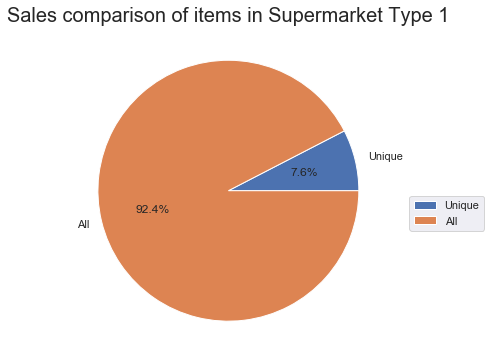

In [82]:
data = pd.DataFrame(data = {
    'item_type' : ['Unique', 'All'],
    'item_sales' : [supermarket1_sales.unique_sales_ratio.mean(), 100 - supermarket1_sales.unique_sales_ratio.mean()]
})

plt.pie(data.item_sales, labels=data.item_type, autopct='%1.1f%%');
plt.title('Sales comparison of items in Supermarket Type 1', fontsize = 20)
plt.legend(data.item_type, bbox_to_anchor=(1.3, 0.5))

**Observations**

1. Supermarket Type 1 have 414 unique items which are not available in other outlet types
2. These unique items have contributed around 7.5 sales for them

**Item types in these unique items**

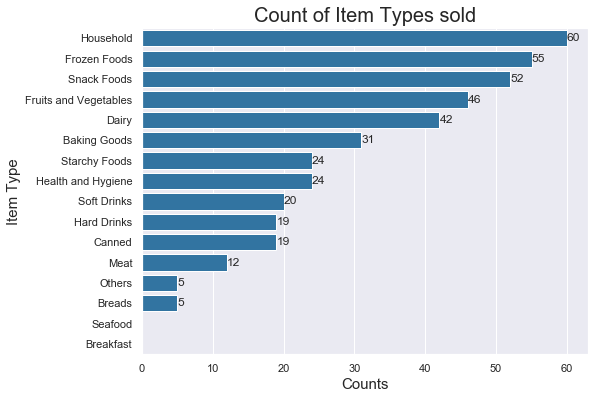

In [83]:
ax = sns.countplot(data=unique_items_supermarket1, y='item_type', color = base_color, order = unique_items_supermarket1.item_type.value_counts().index)
ax = countplotDataLabels(ax, 'h')
ax = setLabels(ax, 'Counts', 'Item Type', 15, 15)
ax.set_title('Count of Item Types sold', fontsize = 20);

**Observations**

1. Here Household item are more compared ot Fruits and Vegetables in overall market items
2. They didn't consist of single unique Seafood and Breakfast items which shows that they were available in other outlets too

# Conclusion

1.	The item sales were highly dependent on total items sold
2.	Tier 2 was able to generate the most sales. It had very selected types of outlets such as all of the outlets were of small-sized and were located in Supermarket Type 1.
3.	Outlet 27 had the highest sales in comparison to other outlets. It is the only outlet which is located in the Supermarket Type 3 location and is of Medium size.
4.	Item in the Supermarket don’t have visibility of more than 0.20%
5.	Item sales do show a threshold depending upon the type of outlet.
6.	Food and Vegetables and Food Snacks are the most promising items for generating more sales.